In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

In [2]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(128, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.shape[0], -1))

In [3]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [4]:
BATCH_SIZE_TEST = 1000
RANDOM_SEED = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(RANDOM_SEED)

In [5]:
test_dataset = FashionMNIST('data/', train=False, download=True, transform=ToTensor())

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [6]:
model = torch.load('models/mnist_model.pt').to(DEVICE)
model.requires_grad = False

criterion = nn.CrossEntropyLoss()

In [7]:
print(model)

CNNClassifier(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [8]:
test()


Test set: Avg. loss: 0.0041, Accuracy: 1015/10000 (10%)



In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

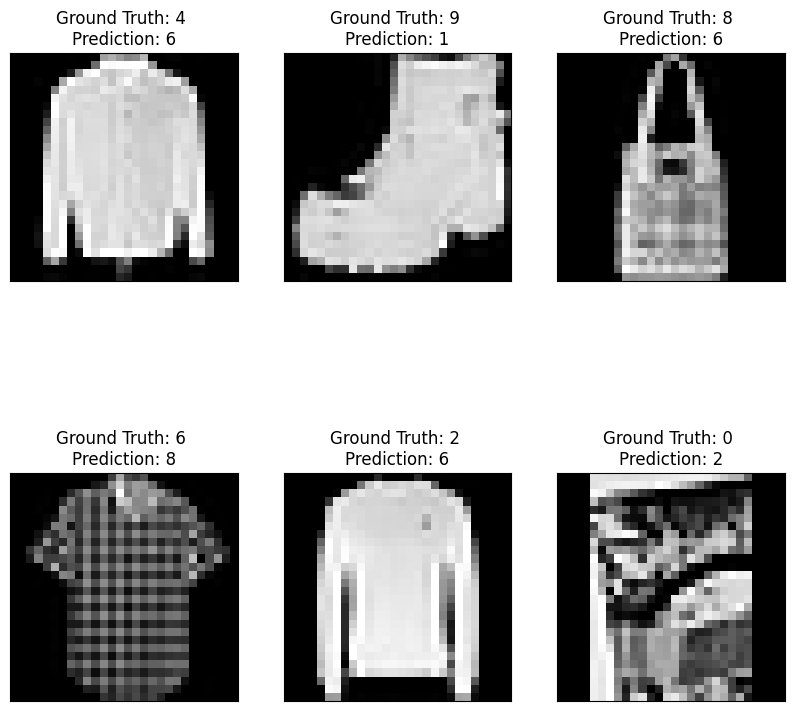

In [10]:
x = example_data.to(DEVICE)
output = model(x)
pred = output.data.max(1, keepdim=True)[1]

plt.figure(figsize=(10, 10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {} \nPrediction: {}".format(example_targets[i], pred[i].item()))
  plt.xticks([])
  plt.yticks([])

plt.show()